## Import packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

## Step I. Load data

In [3]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Build the model and perform parameter tuning

In [4]:
def modelfit(reg, train, target, performCV=True, cv=10, printFeatureImportance=True):
    reg.fit(train, target)
    pred = reg.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(reg, train, target, cv=cv, scoring='r2')
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))

    if printFeatureImportance:
        feat_imp = pd.Series(reg.booster().get_fscore()).sort_values(ascending=False)
        rcParams['figure.figsize'] = 20, 6
        feat_imp.plot(kind='bar')
        plt.title('Feature importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show() 

### Baseline model

In [5]:
params = {}
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.883953387218


In [7]:
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

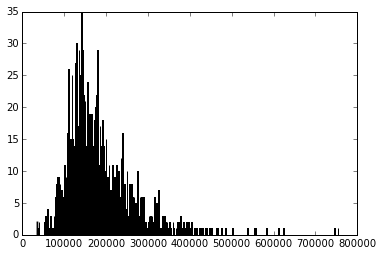

In [9]:
plt.hist(y_train, bins=400)
plt.show()

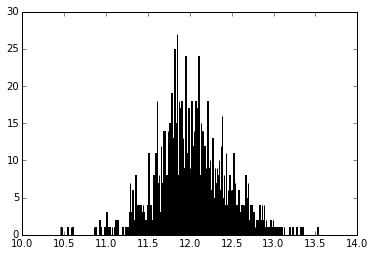

In [10]:
plt.hist(np.log(y_train), bins=400)
plt.show()

In [6]:
params = {}
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{}
0.888299624104


In [11]:
params = {}
grid = GridSearchCV(estimator=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
        objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
        colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{}
0.888299624104


### Grid search

In [14]:
params = {}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{}
0.888299624104


In [15]:
params = {'n_estimators': range(10,500,20)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'n_estimators': 410}
0.895406028507


In [16]:
params = {'n_estimators': range(410,900,20)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'n_estimators': 410}
0.895406028507


In [17]:
params = {'n_estimators': range(390,430,5)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'n_estimators': 415}
0.895522427028


In [18]:
params = {'n_estimators': range(410,420)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'n_estimators': 416}
0.895551249174


In [19]:
params = {'max_depth': range(2,9)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=3, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'max_depth': 2}
0.898942930081


In [20]:
params = {'gamma': [i/10.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'gamma': 0.0}
0.898942930081


In [21]:
params = {'gamma': [i/100.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'gamma': 0.0}
0.898942930081


In [22]:
params = {'min_child_weight': range(0,11)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'min_child_weight': 0}
0.898942930081


In [23]:
params = {'max_delta_step': range(0,11)}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'max_delta_step': 6}
0.899795828481


In [24]:
params = {'subsample': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 1.0}
0.899795828481


In [25]:
params = {'subsample': [i/100.0 for i in range(94,101)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 1.0}
0.899795828481


In [26]:
params = {'subsample': [i/1000.0 for i in range(994,1001)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 0.995}
0.900417218192


In [27]:
params = {'subsample': [i/10000.0 for i in range(9944,9956)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 0.9953}
0.901012859605


In [28]:
params = {'subsample': [i/100000.0 for i in range(99524,99536)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 0.99531}
0.902082555912


In [29]:
params = {'subsample': [i/1000000.0 for i in range(995304,995316)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 0.995304}
0.902208430646


In [30]:
params = {'subsample': [i/1000000.0 for i in range(995301,995306)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=1, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'subsample': 0.995303}
0.902208430646


In [31]:
params = {'colsample_bytree': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bytree': 1.0}
0.902208430646


In [32]:
params = {'colsample_bytree': [i/100.0 for i in range(94,101)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bytree': 1.0}
0.902208430646


In [33]:
params = {'colsample_bytree': [i/1000.0 for i in range(994,1001)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bytree': 1.0}
0.902208430646


In [34]:
params = {'colsample_bylevel': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bylevel': 0.1}
0.902626877771


In [35]:
params = {'colsample_bylevel': [i/100.0 for i in range(4,16)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bylevel': 0.1}
0.902626877771


In [36]:
params = {'colsample_bylevel': [i/1000.0 for i in range(94,106)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bylevel': 0.102}
0.903161968061


In [37]:
params = {'colsample_bylevel': [i/10000.0 for i in range(1014,1026)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bylevel': 0.1015}
0.903161968061


In [38]:
params = {'colsample_bylevel': [i/100000.0 for i in range(10144,10156)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1, colsample_bylevel=1,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, objective='reg:linear',
        silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'colsample_bylevel': 0.10145}
0.903161968061


In [39]:
params = {'reg_alpha': [i/10.0 for i in range(0,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_alpha': 0.1}
0.90369254662


In [40]:
params = {'reg_alpha': [i/100.0 for i in range(4,16)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_alpha': 0.07}
0.903890086641


In [41]:
params = {'reg_alpha': [i/1000.0 for i in range(64,76)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_alpha': 0.07}
0.903890086641


In [42]:
params = {'reg_alpha': [i/10000.0 for i in range(694,706)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_alpha': 0.07}
0.903890086641


In [43]:
params = {'reg_lambda': [i/10.0 for i in range(0,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.7}
0.905199172381


In [44]:
params = {'reg_lambda': [i/100.0 for i in range(64,76)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.7}
0.905199172381


In [45]:
params = {'reg_lambda': [i/1000.0 for i in range(694,706)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.696}
0.905803008917


In [46]:
params = {'reg_lambda': [i/10000.0 for i in range(6954,6966)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.696}
0.905803008917


In [47]:
params = {'reg_lambda': [i/100000.0 for i in range(69594,69606)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.69601}
0.905803102587


In [48]:
params = {'reg_lambda': [i/1000000.0 for i in range(696004,696016)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'reg_lambda': 0.69601}
0.905803102587


In [49]:
params = {'scale_pos_weight': [i/10.0 for i in range(0,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'scale_pos_weight': 0.0}
0.905803102587


In [50]:
params = {'scale_pos_weight': [i/100.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'scale_pos_weight': 0.0}
0.905803102587


In [ ]:
params = {'scale_pos_weight': [i/100.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

In [51]:
params = {'scale_pos_weight': [i/1000.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'scale_pos_weight': 0.0}
0.905803102587


In [52]:
params = {'base_score': [i/10.0 for i in range(0,11)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'base_score': 0.5}
0.905803102587


In [53]:
params = {'base_score': [i/100.0 for i in range(44,56)]}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{'base_score': 0.5}
0.905803102587


### Final model

In [54]:
params = {}
grid = GridSearchCV(estimator=XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None), param_grid=params, cv=10,
        scoring='r2', n_jobs=-1)
grid.fit(X_train, np.log(y_train))
print grid.best_params_
print grid.best_score_

{}
0.905803102587



Model Report
Train_coef_of_det: 0.953206
CV_coef_of_det: Mean-0.905803 | Std-0.024932 | Min-0.851050 | Max-0.939100


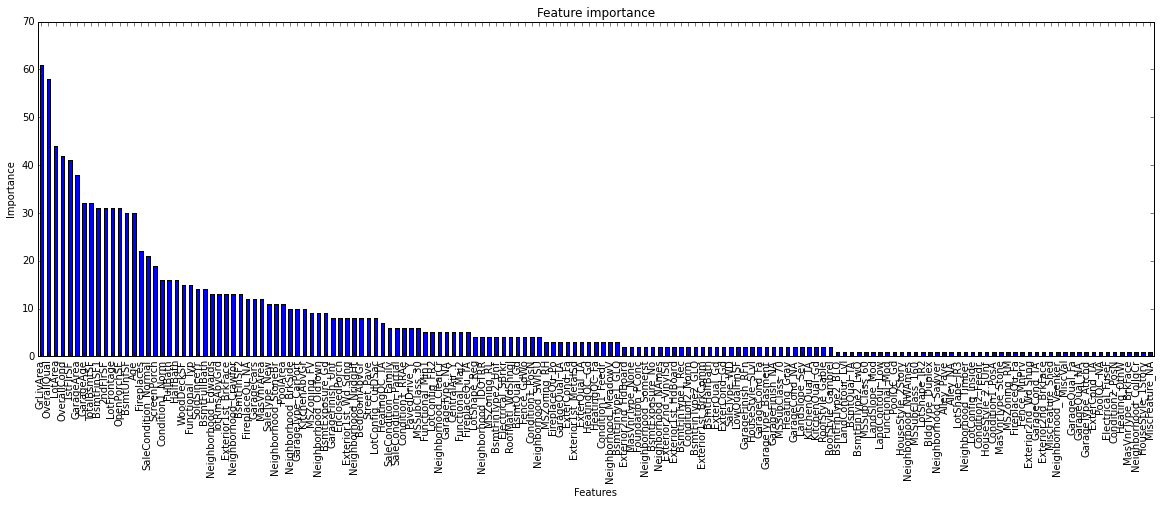

In [56]:
reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
        gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
        colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
        objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
modelfit(reg1, X_train, np.log(y_train))

In [57]:
feat_imp = pd.Series(reg1.booster().get_fscore()).sort_values(ascending=False)

In [62]:
best_r2_score = 0
best_fract_feat = 1.0
for i in [j/10.0 for j in range(1,11)]:
    fract_feat = i
    X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
    reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
    cv_r2_score = cross_val_score(reg1, X_train_new, np.log(y_train), cv=10, scoring='r2')    
    if np.mean(cv_r2_score) > best_r2_score:
        best_r2_score = np.mean(cv_r2_score)
        best_fract_feat = fract_feat
        
print 'Best_fraction_of_features: ', best_fract_feat
print 'Best_r2_score: ', best_r2_score

Best_fraction_of_features:  0.6
Best_r2_score:  0.907588908396


In [63]:
best_r2_score = 0
best_fract_feat = 1.0
for i in [j/100.0 for j in range(54,66)]:
    fract_feat = i
    X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
    reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
    cv_r2_score = cross_val_score(reg1, X_train_new, np.log(y_train), cv=10, scoring='r2')    
    if np.mean(cv_r2_score) > best_r2_score:
        best_r2_score = np.mean(cv_r2_score)
        best_fract_feat = fract_feat
        
print 'Best_fraction_of_features: ', best_fract_feat
print 'Best_r2_score: ', best_r2_score

Best_fraction_of_features:  0.55
Best_r2_score:  0.908731067761


In [64]:
best_r2_score = 0
best_fract_feat = 1.0
for i in [j/1000.0 for j in range(544,556)]:
    fract_feat = i
    X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
    reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
    cv_r2_score = cross_val_score(reg1, X_train_new, np.log(y_train), cv=10, scoring='r2')    
    if np.mean(cv_r2_score) > best_r2_score:
        best_r2_score = np.mean(cv_r2_score)
        best_fract_feat = fract_feat
        
print 'Best_fraction_of_features: ', best_fract_feat
print 'Best_r2_score: ', best_r2_score

Best_fraction_of_features:  0.548
Best_r2_score:  0.908731067761


In [66]:
best_r2_score = 0
best_fract_feat = 1.0
for i in [j/10000.0 for j in range(5474,5486)]:
    fract_feat = i
    X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
    reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
    cv_r2_score = cross_val_score(reg1, X_train_new, np.log(y_train), cv=10, scoring='r2')    
    if np.mean(cv_r2_score) > best_r2_score:
        best_r2_score = np.mean(cv_r2_score)
        best_fract_feat = fract_feat
        
print 'Best_fraction_of_features: ', best_fract_feat
print 'Best_r2_score: ', best_r2_score

Best_fraction_of_features:  0.5478
Best_r2_score:  0.908731067761


### Grid search + Random search

In [ ]:
fract_feat = 0.55
X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
reg1.fit( X_train_new, np.log(y_train))
feat_imp = pd.Series(reg1.booster().get_fscore()).sort_values(ascending=False)

In [23]:
tmp = time.time()
params = {
          'learning_rate': [0.1],
          'n_estimators': range(400,440),
          'max_depth': range(2,6),          
          'gamma': [i/10.0 for i in range(0,4)],
          'min_child_weight': range(0,7),
          'max_delta_step': range(2,9),
          'subsample': [i/100.0 for i in range(99,101)],
          'colsample_bytree': [i/10000.0 for i in range(9000,10001)],
          'colsample_bylevel': [i/1000.0 for i in range(95,107)],
          'reg_alpha': [i/10000.0 for i in range(600,900)],
          'reg_lambda': [i/10000.0 for i in range(6500,7500)],
          'scale_pos_weight': [i/10000.0 for i in range(9900,10001)],
          'objective' : ['reg:linear'],
          'base_score': [i/10.0 for i in range(0,11)],
          'silent': [False],
          'nthread': [-1],
          'seed': [10],
          'missing': [None]
         }   
rand = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=params, cv=10, scoring='r2',
         n_iter=10, random_state=10, n_jobs=-1)
rand.fit(X_train_new, np.log(y_train))
print 'Best parameters: \n', rand.best_params_
print '\tBest score: ', rand.best_score_
print 'Time: ', str(time.time()-tmp)

OverflowError: long int too large to convert to int


Model Report
Train_coef_of_det: 0.992004
CV_coef_of_det: Mean-0.896660 | Std-0.044981 | Min-0.769937 | Max-0.931740


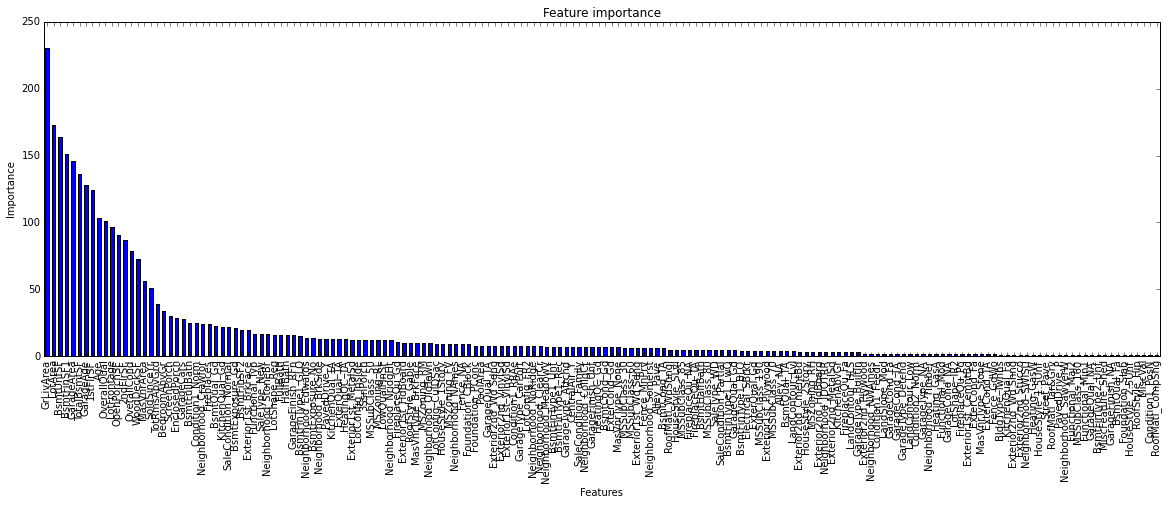

In [13]:
params = {'reg_alpha': 0.2, 'colsample_bytree': 0.9, 'silent': False, 'missing': None, 'scale_pos_weight': 0.0,
          'learning_rate': 0.1, 'colsample_bylevel': 0.5, 'max_delta_step': 0, 'nthread': -1, 'min_child_weight': 4,
          'n_estimators': 170, 'subsample': 1.0, 'reg_lambda': 0.7, 'seed': 10, 'base_score': 0.4, 'max_depth': 5,
          'gamma': 0.4}
reg1 = XGBRegressor(
                    learning_rate = params['learning_rate'],
                    n_estimators = params['n_estimators'],
                    max_depth = params['max_depth'],
                    gamma = params['gamma'],                        
                    max_delta_step = params['max_delta_step'],
                    min_child_weight = params['min_child_weight'],
                    subsample = params['subsample'],
                    colsample_bytree = params['colsample_bytree'],
                    colsample_bylevel = params['colsample_bylevel'],
                    reg_alpha = params['reg_alpha'],
                    reg_lambda = params['reg_lambda'],
                    scale_pos_weight = params['scale_pos_weight'],
                    base_score = params['base_score'],
                    objective = params['objective'],
                    silent = params['silent'],
                    nthread = params['nthread'],
                    seed = params['seed'],
                    missing = params['missing']      
                    )
modelfit(reg1, X_train_new, np.log(y_train))

### Grid search + Bayesian optimization ( 'hyperopt' package )

In [75]:
fract_feat = 0.55
X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
reg1.fit( X_train_new, np.log(y_train))
feat_imp = pd.Series(reg1.booster().get_fscore()).sort_values(ascending=False)

In [ ]:
min_score = float('inf')
best_params = ''
c = 0

fract_feat = 0.55 # params['fract_feat']
X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    
    reg = XGBRegressor(
                        learning_rate = params['learning_rate'],
                        n_estimators = params['n_estimators'],
                        max_depth = params['max_depth'],
                        gamma = params['gamma'],                        
                        max_delta_step = params['max_delta_step'],
                        min_child_weight = params['min_child_weight'],
                        subsample = params['subsample'],
                        colsample_bytree = params['colsample_bytree'],
                        colsample_bylevel = params['colsample_bylevel'],
                        reg_alpha = params['reg_alpha'],
                        reg_lambda = params['reg_lambda'],
                        scale_pos_weight = params['scale_pos_weight'],
                        base_score = params['base_score'],
                        objective = params['objective'],
                        silent = params['silent'],
                        nthread = params['nthread'],
                        seed = params['seed'],
                        missing = params['missing']
                        )
    cv_r2_score = cross_val_score(reg, X_train_new, np.log(y_train), cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {        
             'learning_rate' : hp.choice('learning_rate', [0.1]),
             'n_estimators' : hp.choice('n_estimators', np.arange(400,440)),
             'max_depth' : hp.choice('max_depth', np.arange(2,6)),
             'gamma' : hp.uniform('gamma', 0, 3),
             'max_delta_step' : hp.choice('max_delta_step', np.arange(3,9)),
             'min_child_weight' : hp.choice('min_child_weight', np.arange(0,7)),             
             'subsample' : hp.uniform('subsample', 0.99, 1.0),
             'colsample_bytree' : hp.uniform('colsample_bytree', 0.9, 1.0),
             'colsample_bylevel' : hp.uniform('colsample_bylevel', 0.095, 0.109),
             'reg_alpha' : hp.uniform('reg_alpha', 0.06, 0.09),
             'reg_lambda' : hp.uniform('reg_lambda', 0.65, 0.75),
             'scale_pos_weight' : hp.uniform('scale_pos_weight', 0.99, 1.00),
             'base_score' : hp.choice('base_score', [i/10.0 for i in range(0,11)]),
             'objective' : hp.choice('objective', ['reg:linear']),
             'silent' : hp.choice('silent', [False]),
             'nthread' : hp.choice('nthread', [-1]),
             'seed' : hp.choice('seed', [10]),
             'missing' : hp.choice('missing', [None])
             #'fract_feat': hp.uniform('fract_feat', 4.0, 7.0)
             }
    best = fmin(score, space, algo=tpe.suggest, max_evals=5000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'reg_alpha': 0.06687818128861349, 'colsample_bylevel': 0.1038150104289235, 'scale_pos_weight': 0.9910177494517112, 'learning_rate': 0.1, 'max_delta_step': 8, 'base_score': 0.7, 'n_estimators': 429, 'seed': 10, 'colsample_bytree': 0.9394295367006077, 'silent': False, 'missing': None, 'nthread': -1, 'min_child_weight': 1, 'subsample': 0.9916592093763312, 'reg_lambda': 0.7162895674122727, 'objective': 'reg:linear', 'max_depth': 5, 'gamma': 2.723821181200334}
	Score: 0.803265640798
	Best score: 0.803265640798

Interation no.:  2
Training with params : 
{'reg_alpha': 0.07546055101971813, 'colsample_bylevel': 0.10484062789797975, 'scale_pos_weight': 0.9986746924005809, 'learning_rate': 0.1, 'max_delta_step': 3, 'base_score': 0.4, 'n_estimators': 425, 'seed': 10, 'colsample_bytree': 0.9461784398524923, 'silent': False, 'missing': None, 'nthread': -1, 'min_child_weight': 5, 'subsample': 0.9923984656537466, 'reg_lambda': 0.6974747078532201, 'objective


Model Report
Train_coef_of_det: 0.997028
CV_coef_of_det: Mean-0.905872 | Std-0.035154 | Min-0.807125 | Max-0.941878


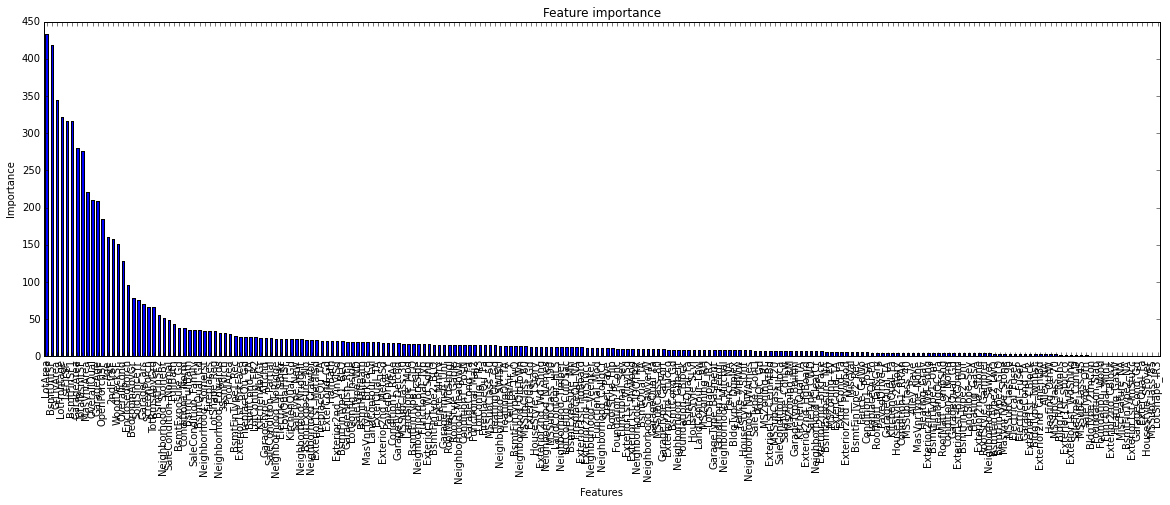

In [131]:
params = {'reg_alpha': 0.2488306517953651, 'colsample_bylevel': 0.408428905857428,
          'scale_pos_weight': 0.9984620415066895, 'learning_rate': 0.1, 'max_delta_step': 0, 'base_score': 0.5,
          'n_estimators': 1070, 'seed': 10, 'colsample_bytree': 0.9489607182872746, 'silent': False, 'missing': None,
          'nthread': -1, 'min_child_weight': 0.3, 'subsample': 0.9844783382327149, 'reg_lambda': 0.9993727646886654,
          'objective': 'reg:linear', 'max_depth': 3, 'gamma': 2.5777502101292433}
reg1 = XGBRegressor(
                    learning_rate = params['learning_rate'],
                    n_estimators = params['n_estimators'],
                    max_depth = params['max_depth'],
                    gamma = params['gamma'],                        
                    max_delta_step = params['max_delta_step'],
                    min_child_weight = params['min_child_weight'],
                    subsample = params['subsample'],
                    colsample_bytree = params['colsample_bytree'],
                    colsample_bylevel = params['colsample_bylevel'],
                    reg_alpha = params['reg_alpha'],
                    reg_lambda = params['reg_lambda'],
                    scale_pos_weight = params['scale_pos_weight'],
                    base_score = params['base_score'],
                    objective = params['objective'],
                    silent = params['silent'],
                    nthread = params['nthread'],
                    seed = params['seed'],
                    missing = params['missing']                  
                    )
modelfit(reg1, X_train_new, np.log(y_train))

### Grid search + Genetic programming ( 'sklearn-deap' package )

In [ ]:
fract_feat = 0.55
X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
reg1 = XGBRegressor(n_estimators=416, learning_rate=0.1, max_depth=2, 
            gamma=0, min_child_weight=1, max_delta_step=6, subsample=0.995303, colsample_bytree=1,
            colsample_bylevel=0.102, reg_alpha=0.07, reg_lambda=0.69601, scale_pos_weight=1, base_score=0.5,
            objective='reg:linear', silent=False, nthread=-1, seed=10, missing=None)
reg1.fit( X_train_new, np.log(y_train))
feat_imp = pd.Series(reg1.booster().get_fscore()).sort_values(ascending=False)

In [54]:
params = {
    'learning_rate': [0.1],
          'n_estimators': range(400,440),
          'max_depth': range(2,6),          
          'gamma': [i/10.0 for i in range(0,4)],
          'min_child_weight': range(0,7),
          'max_delta_step': range(2,9),
          'subsample': [i/100.0 for i in range(99,101)],
          'colsample_bytree': [i/10000.0 for i in range(9000,10001)],
          'colsample_bylevel': [i/1000.0 for i in range(95,107)],
          'reg_alpha': [i/10000.0 for i in range(600,900)],
          'reg_lambda': [i/10000.0 for i in range(6500,7500)],
          'scale_pos_weight': [i/10000.0 for i in range(9900,10001)],
          'objective' : ['reg:linear'],
          'base_score': [i/10.0 for i in range(0,11)],
          'silent': [False],
          'nthread': [-1],
          'seed': [10],
          'missing': [None]
    
          'learning_rate': [0.1],
          'n_estimators': range(700,1100,10),
          'max_depth': range(2,6),          
          'gamma': [i/10.0 for i in range(0,4)],
          'min_child_weight': range(0,7),
          'max_delta_step': range(0,4),
          'subsample': [i/100.0 for i in range(90,101)],
          'colsample_bytree': [i/10000.0 for i in range(9000,10001)],
          'colsample_bylevel': [i/10000.0 for i in range(4000,5000)],
          'reg_alpha': [i/10000.0 for i in range(2000,3000)],
          'reg_lambda': [i/10000000.0 for i in range(9993000,9995000)],
          'scale_pos_weight': [i/10000.0 for i in range(9900,10001)],
          'objective' : ['reg:linear'],
          'base_score': [i/10.0 for i in range(0,11)],
          'silent': [False],
          'nthread': [-1],
          'seed': [10],
          'missing': [None]
         }
evol = EvolutionaryAlgorithmSearchCV(estimator=XGBRegressor(), params=params, cv=10,
        scoring='r2', population_size=100, gene_mutation_prob=0.1, gene_crossover_prob=0.5, tournament_size=3,
        generations_number=10, verbose=True, n_jobs=-1)
evol.fit(X_train_new, np.log(y_train))

Types [2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2] and maxint [999, 1000, 0, 999, 100, 0, 0, 3, 0, 6, 39, 10, 1999, 0, 10, 0, 3, 3] detected
--- Evolve in -4283217129029238784 possible combinations ---
gen	nevals	avg     	min    	max     
0  	100   	-4.61376	-6.5602	0.916495
1  	60    	-2.22469	-6.55834	0.918306
2  	59    	0.608115	-6.5458 	0.918306
3  	59    	0.835471	-6.5472 	0.922063
4  	57    	0.83697 	-6.55934	0.923093
5  	70    	0.761462	-6.55009	0.923093
6  	51    	0.839362	-6.54469	0.923279
7  	47    	0.764248	-6.55891	0.923837
8  	60    	0.841682	-6.55162	0.92673 
9  	69    	0.917055	0.895142	0.92673 
10 	61    	0.845638	-6.55937	0.927173
Best individual is: {'reg_alpha': 0.2521, 'colsample_bytree': 0.9883, 'silent': False, 'colsample_bylevel': 0.4679, 'scale_pos_weight': 0.9934, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': -1, 'min_child_weight': 0, 'n_estimators': 810, 'subsample': 0.94, 'reg_lambda': 0.9994066, 'seed': 10, 'base_score': 0


Model Report
Train_coef_of_det: 0.995726
CV_coef_of_det: Mean-0.898286 | Std-0.036882 | Min-0.805911 | Max-0.941329


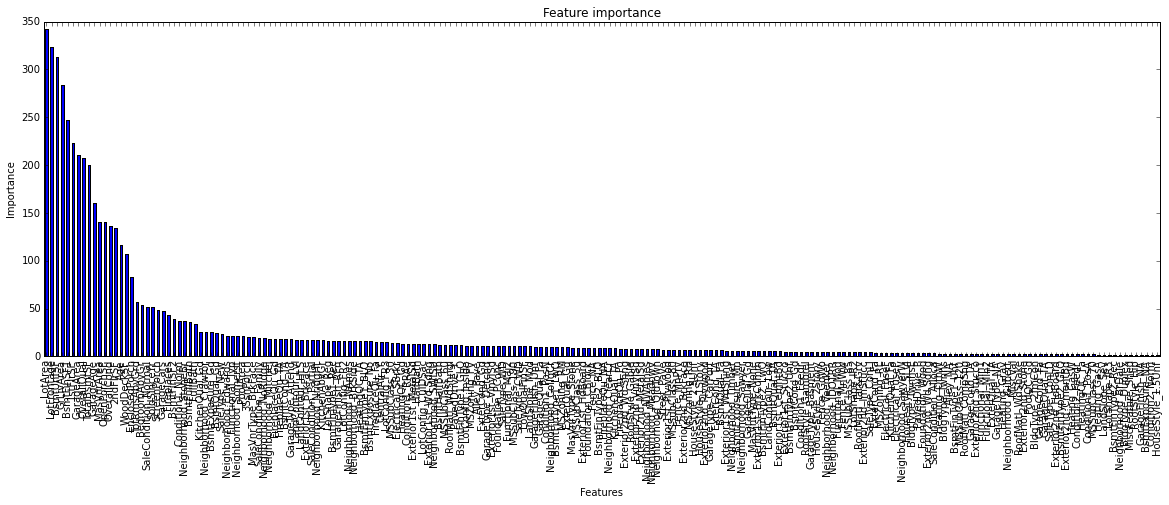

In [55]:
params =  {'reg_alpha': 0.2521, 'colsample_bytree': 0.9883, 'silent': False, 'colsample_bylevel': 0.4679,
           'scale_pos_weight': 0.9934, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': -1,
           'min_child_weight': 0, 'n_estimators': 810, 'subsample': 0.94, 'reg_lambda': 0.9994066, 'seed': 10,
           'base_score': 0.2, 'objective': 'reg:linear', 'max_depth': 3, 'gamma': 0.1}
reg1 = XGBRegressor(
                    learning_rate = params['learning_rate'],
                    n_estimators = params['n_estimators'],
                    max_depth = params['max_depth'],
                    gamma = params['gamma'],                        
                    max_delta_step = params['max_delta_step'],
                    min_child_weight = params['min_child_weight'],
                    subsample = params['subsample'],
                    colsample_bytree = params['colsample_bytree'],
                    colsample_bylevel = params['colsample_bylevel'],
                    reg_alpha = params['reg_alpha'],
                    reg_lambda = params['reg_lambda'],
                    scale_pos_weight = params['scale_pos_weight'],
                    base_score = params['base_score'],
                    objective = params['objective'],
                    silent = params['silent'],
                    nthread = params['nthread'],
                    seed = params['seed'],
                    missing = params['missing']
                    )
modelfit(reg1, X_train_new, np.log(y_train))

### Make predictions and save results

In [71]:
fract_feat = 0.55
X_train_new = X_train[feat_imp.index[:int(fract_feat*len(feat_imp))]]
X_test_new = X_test[feat_imp.index[:int(fract_feat*len(feat_imp))]]
reg1.fit( X_train_new, np.log(y_train))

test_pred = np.exp(reg1.predict(X_test_new))
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)